In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv", usecols=["class", "viewCount", "commentCount", "likeCount", "dislikeCount"]) 
test_data = pd.read_csv("test_1.csv", usecols=["ID","viewCount", "commentCount", "likeCount", "dislikeCount"])

Y_train = train_data["class"]

X_train = train_data.drop("class", axis=1)

X_test = test_data.drop("ID", axis=1)

X_train = X_train.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
X_test = X_test.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [3]:
Y_train.describe()

count      7105
unique        2
top       False
freq       3557
Name: class, dtype: object

In [4]:
train_data.head()

,viewCount,likeCount,dislikeCount,commentCount,class
0,10509398.0,945921.0,5614.0,58844,True
1,4829.0,57.0,81.0,22,False
2,1015456.0,36679.0,492.0,3739,True
3,64629.0,2111.0,24.0,151,False
4,206468.0,1335.0,96.0,470,False


In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
sc_transform = scaler.transform(X_train)
X_train = pd.DataFrame(sc_transform)

In [7]:
X_train.head()

,0,1,2,3
0,1.878598,4.063041,0.235600,2.145346
1,-0.422865,-0.295712,-0.197023,-0.279667
2,-0.201445,-0.126950,-0.164887,-0.126428
3,-0.409763,-0.286247,-0.201480,-0.274348
4,-0.378688,-0.289823,-0.195850,-0.261197


In [13]:
svc = SVC()
svc.fit(X_train, Y_train)
model_pred = svc.predict(X_train)
model_f1 = f1_score(Y_train, model_pred)

print('Support Vector Classifier F1 score: %f' % model_f1)

Support Vector Classifier F1 score: 0.563908


In [23]:
svc = SVC()
svc.fit(X_train, Y_train)
model_pred = svc.predict(X_train)

svc_scores = cross_val_score(svc, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(svc_scores)
print('cv_scores mean:{}'.format(np.mean(svc_scores)))

[0.52422145 0.56458512 0.60204082 0.52867384 0.55017301]
cv_scores mean:0.5539388461206235


In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
model_pred = dt.predict(X_train)

dt_scores = cross_val_score(dt, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(dt_scores)
print('cv_scores mean:{}'.format(np.mean(dt_scores)))

[0.70662906 0.71988596 0.71751412 0.72701754 0.72791024]
cv_scores mean:0.7197913840499347


In [26]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
model_pred = lr.predict(X_train)

lr_scores = cross_val_score(lr, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(lr_scores)
print('cv_scores mean:{}'.format(np.mean(lr_scores)))

[0.46828358 0.5018315  0.53418414 0.49953575 0.51239669]
cv_scores mean:0.5032463328284499


In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
model_pred = knn.predict(X_train)

knn_scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(knn_scores)
print('cv_scores mean:{}'.format(np.mean(knn_scores)))

[0.7622842  0.77630662 0.75614898 0.7601683  0.74520548]
cv_scores mean:0.7600227160359123


In [28]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
model_pred = nb.predict(X_train)

nb_scores = cross_val_score(nb, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(nb_scores)
print('cv_scores mean:{}'.format(np.mean(nb_scores)))

[0.23095238 0.25059102 0.27610209 0.25977011 0.30665163]
cv_scores mean:0.2648134470668429


In [72]:
knn = KNeighborsClassifier()

In [77]:
neighbors = list(range(1,30))

hyperparameters = dict(n_neighbors=neighbors)

In [78]:
knn_2 = KNeighborsClassifier(p=2)

clf = GridSearchCV(knn_2, hyperparameters, cv=5)

clf.fit(X_train, Y_train)
clf.grid_scores_

C:\Users\owenf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.73047, std: 0.00617, params: {'n_neighbors': 1},
 mean: 0.71879, std: 0.00983, params: {'n_neighbors': 2},
 mean: 0.74849, std: 0.01096, params: {'n_neighbors': 3},
 mean: 0.74792, std: 0.00621, params: {'n_neighbors': 4},
 mean: 0.75510, std: 0.01202, params: {'n_neighbors': 5},
 mean: 0.75229, std: 0.01291, params: {'n_neighbors': 6},
 mean: 0.75975, std: 0.00904, params: {'n_neighbors': 7},
 mean: 0.76045, std: 0.00897, params: {'n_neighbors': 8},
 mean: 0.75806, std: 0.01160, params: {'n_neighbors': 9},
 mean: 0.76284, std: 0.00795, params: {'n_neighbors': 10},
 mean: 0.75764, std: 0.00588, params: {'n_neighbors': 11},
 mean: 0.76045, std: 0.00612, params: {'n_neighbors': 12},
 mean: 0.75426, std: 0.00773, params: {'n_neighbors': 13},
 mean: 0.75876, std: 0.00825, params: {'n_neighbors': 14},
 mean: 0.75412, std: 0.00747, params: {'n_neighbors': 15},
 mean: 0.75510, std: 0.00960, params: {'n_neighbors': 16},
 mean: 0.75355, std: 0.00759, params: {'n_neighbors': 17},
 mean:

In [79]:
clf_mean_scores = [result.mean_validation_score for result in clf.grid_scores_]

C:\Users\owenf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0,0.5,'Cross-Validated Accuracy')

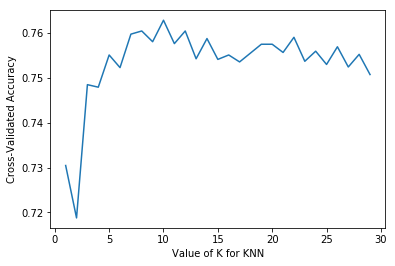

In [80]:
plt.plot(neighbors, clf_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [81]:
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 10


In [82]:
neighbors_val = best_model.best_estimator_.get_params()['n_neighbors']

In [83]:
model = KNeighborsClassifier(n_neighbors = neighbors_val)
model.fit(X_train, Y_train)
model_pred = model.predict(X_train)
model_f1 = f1_score(Y_train, model_pred)

print('KNN Model F1 score after hyperparameter tuning: %f' % model_f1)

KNN Model F1 score after hyperparameter tuning: 0.804928


In [84]:
Y_pred = model.predict(X_test)

test_data["class"] = Y_pred
result = test_data[["ID","class"]]
result.to_csv("result.csv", index=False)
result.head()

,ID,class
0,oRB8lJynqBA,False
1,of-UPoEnw_w,False
2,d28cz00HHto,False
3,Tftg_LnwTW0,False
4,qR0mkm65Whk,False


In [85]:
result.describe()

,ID,class
count,646,646
unique,646,2
top,rVsNNDhBhVU,False
freq,1,346
